In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
scaler = MinMaxScaler()

In [ ]:
df = pd.read_excel("NASDAQ Realized Volatility.xlsx",index_col='Date',parse_dates=True)
df_for_date=df[int(len(df['Realised'])*0.7):].reset_index()

In [ ]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  for i in range(len(test)):
    row = [[a] for a in scaled_test_input[i:i+window_size]]
    X.append(row)
  return np.array(X)

Epoch: 7 | Inputs: 21 | Nodes: 168 | Dropout: 0 | Loss: huber_loss

# H=1 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
for i in range (15):
  n_features = 2
  n_input = 21
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(168, activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=7)
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(len(test), n_input, n_features)
  y_hat=model.predict(X)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/7
64/64 [==============================] - 8s 6ms/step - loss: 0.0024 - accuracy: 4.9383e-04 - mean_absolute_error: 0.0448
Epoch 2/7
64/64 [==============================] - 0s 5ms/step - loss: 0.0019 - accuracy: 4.9383e-04 - mean_absolute_error: 0.0377
Epoch 3/7
64/64 [==============================] - 0s 5ms/step - loss: 0.0017 - accuracy: 4.9383e-04 - mean_absolute_error: 0.0362
Epoch 4/7
64/64 [==============================] - 0s 5ms/step - loss: 0.0017 - accuracy: 4.9383e-04 - mean_absolute_error: 0.0367
Epoch 5/7
64/64 [==============================] - 0s 5ms/step - loss: 0.0017 - accuracy: 4.9383e-04 - mean_absolute_error: 0.0368
Epoch 6/7
64/64 [==============================] - 0s 6ms/step - loss: 0.0016 - accuracy: 4.9383e-04 - mean_absolute_error: 0.0348
Epoch 7/7
55/55 [==============================] - 1s 3ms/step
Epoch 1/7
64/64 [==============================] - 3s 5ms/step - loss: 0.0022 - accuracy: 4.9383e-04 - mean_absolute_error: 0.0416
Epoch 2/7
64/64 [===

In [ ]:
Accuracy

[62.49853350517086,
 64.46028029827195,
 64.10726859945204,
 62.968183953270284,
 55.4280328443386,
 66.35523407495238,
 65.46699583763645,
 63.769453280924935,
 67.1280377986212,
 66.66649825246351,
 64.38657320536191,
 61.46740624303767,
 63.58722825068822,
 64.49706954499166,
 60.68563436650914]

In [ ]:
RMSE

[0.0034633131937505893,
 0.0034164411051600513,
 0.0034125385825677806,
 0.003468338939199212,
 0.0036266928185077867,
 0.003403042407133144,
 0.00344782605040151,
 0.003423920821221955,
 0.0034176594768967066,
 0.0033934665058866624,
 0.0034178579385354957,
 0.0034609287378082627,
 0.0034154097394091245,
 0.0034515042543267938,
 0.0034668034730931056]

In [ ]:
Quasilikelihood

[0.09732537900716767,
 0.09178343545524083,
 0.09249687206607772,
 0.09611434882729426,
 0.12479466686813674,
 0.08657006829108901,
 0.09002406115300823,
 0.09372418637789226,
 0.08614542226574619,
 0.08577035899505846,
 0.09172728425926469,
 0.10151882885063272,
 0.0936647153014308,
 0.09255134280300678,
 0.10369508814786901]

In [ ]:
df_for_date=df[int(len(df['Realised'])*0.7):].reset_index()

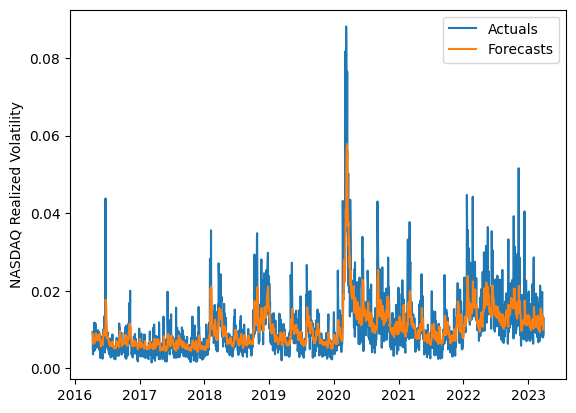

In [ ]:
# Best model
plt.plot(df_for_date["Date"], test)
plt.plot(df_for_date["Date"], true_predictions) 
plt.ylabel("NASDAQ Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=3 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/3)):
    row = [[a] for a in scaled_test_input[i*3:(i*3)+window_size]]
    X.append(row)
  return np.array(X)

In [ ]:
for i in range (15):
  n_features = 2
  n_input = 21
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(168, activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dense(3))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=7)
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/3))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/7
64/64 [==============================] - 3s 5ms/step - loss: 0.0021 - accuracy: 0.4444 - mean_absolute_error: 0.0414
Epoch 2/7
64/64 [==============================] - 0s 5ms/step - loss: 0.0019 - accuracy: 0.3837 - mean_absolute_error: 0.0382
Epoch 3/7
64/64 [==============================] - 0s 5ms/step - loss: 0.0018 - accuracy: 0.3343 - mean_absolute_error: 0.0378
Epoch 4/7
64/64 [==============================] - 0s 5ms/step - loss: 0.0017 - accuracy: 0.4198 - mean_absolute_error: 0.0366
Epoch 5/7
64/64 [==============================] - 0s 6ms/step - loss: 0.0017 - accuracy: 0.5249 - mean_absolute_error: 0.0363
Epoch 6/7
64/64 [==============================] - 0s 5ms/step - loss: 0.0017 - accuracy: 0.4099 - mean_absolute_error: 0.0372
Epoch 7/7
19/19 [==============================] - 0s 2ms/step
Epoch 1/7
64/64 [==============================] - 3s 5ms/step - loss: 0.0021 - accuracy: 0.3758 - mean_absolute_error: 0.0415
Epoch 2/7
64/64 [==============================]

In [ ]:
RMSE

[0.00359468986491462,
 0.003611121031767115,
 0.0037801738724869216,
 0.0038771011611766107,
 0.003596831744704124,
 0.0036144925581450774,
 0.0035907779178219633,
 0.003598609561836163,
 0.0037407512436570542,
 0.0037286341792099145,
 0.003607110454350544,
 0.003581852442946648,
 0.003596972191645849,
 0.0035946497218134945,
 0.0037563442201357703]

In [ ]:
Accuracy

[61.99621503928356,
 65.39558212375142,
 55.29132986108356,
 51.91687598578012,
 62.33509358342935,
 62.99430806871784,
 63.47048137689506,
 62.27992868073968,
 66.2590999978388,
 56.362656860734084,
 62.44361205221778,
 65.14372818931471,
 65.52224586420606,
 64.03492514043292,
 57.4323441666935]

In [ ]:
Quasilikelihood

[0.10267077403458322,
 0.09429831359016026,
 0.1251771938979666,
 0.13965343910005307,
 0.1017565744131618,
 0.10085775776279735,
 0.09820188901112356,
 0.10179774360150919,
 0.09889222632079263,
 0.12185205850731726,
 0.10190608614678605,
 0.09444918118626795,
 0.09445768671914048,
 0.09689964162032218,
 0.1191333045807088]

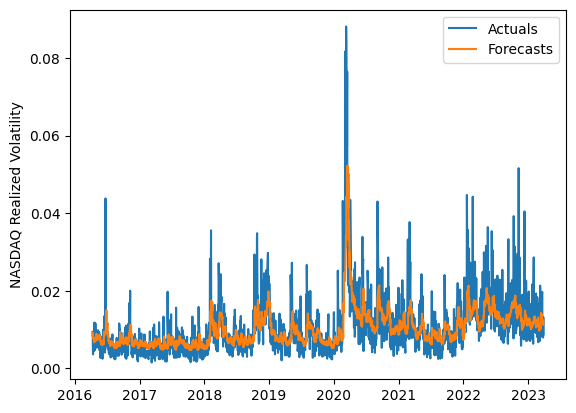

In [ ]:
# Best model
plt.plot(df_for_date["Date"], test)
plt.plot(df_for_date["Date"], true_predictions) 
plt.ylabel("NASDAQ Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=5 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/5)):
    row = [[a] for a in scaled_test_input[i*5:(i*5)+window_size]]
    X.append(row)
  return np.array(X)

In [ ]:
for i in range (15):
  n_features = 2
  n_input = 21
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(168, activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dense(5))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=7)
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/5))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/7
64/64 [==============================] - 3s 6ms/step - loss: 0.0027 - accuracy: 0.2627 - mean_absolute_error: 0.0461
Epoch 2/7
64/64 [==============================] - 0s 6ms/step - loss: 0.0020 - accuracy: 0.3798 - mean_absolute_error: 0.0394
Epoch 3/7
64/64 [==============================] - 0s 6ms/step - loss: 0.0018 - accuracy: 0.2652 - mean_absolute_error: 0.0376
Epoch 4/7
64/64 [==============================] - 0s 5ms/step - loss: 0.0018 - accuracy: 0.1951 - mean_absolute_error: 0.0375
Epoch 5/7
64/64 [==============================] - 0s 6ms/step - loss: 0.0018 - accuracy: 0.2835 - mean_absolute_error: 0.0378
Epoch 6/7
64/64 [==============================] - 0s 6ms/step - loss: 0.0019 - accuracy: 0.2553 - mean_absolute_error: 0.0381
Epoch 7/7
11/11 [==============================] - 0s 3ms/step
Epoch 1/7
64/64 [==============================] - 2s 6ms/step - loss: 0.0022 - accuracy: 0.2020 - mean_absolute_error: 0.0423
Epoch 2/7
64/64 [==============================]

In [ ]:
RMSE

[0.0038382617380734773,
 0.0038088196290025863,
 0.0038986195507794996,
 0.003958345555224511,
 0.0041193645343334155,
 0.004047007591355011,
 0.0039418622322081424,
 0.0037150981868128725,
 0.003783294131372482,
 0.003748650144034811,
 0.003947727350179994,
 0.003767926048543407,
 0.003740497975731441,
 0.003802225278049412,
 0.0037921219447569947]

In [ ]:
Accuracy

[56.07299904460206,
 65.19974375239453,
 54.17120050780851,
 53.807577863962194,
 49.13852151932976,
 49.086972290040855,
 54.52583951338787,
 62.668103926337125,
 59.857269897860476,
 59.991988537400175,
 64.26705179941716,
 59.98052696005516,
 59.686638002702,
 58.9132747929741,
 57.8916629457499]

In [ ]:
Quasilikelihood

[0.12603067676609536,
 0.10181344226389648,
 0.13239352175067137,
 0.13352833389661398,
 0.15228928647925905,
 0.15577933555953308,
 0.13101226470092522,
 0.10480153817677586,
 0.11481723583627818,
 0.1121242661953381,
 0.1151739301539752,
 0.11335621422610968,
 0.11362108015122509,
 0.11601579232125954,
 0.11988130739967215]

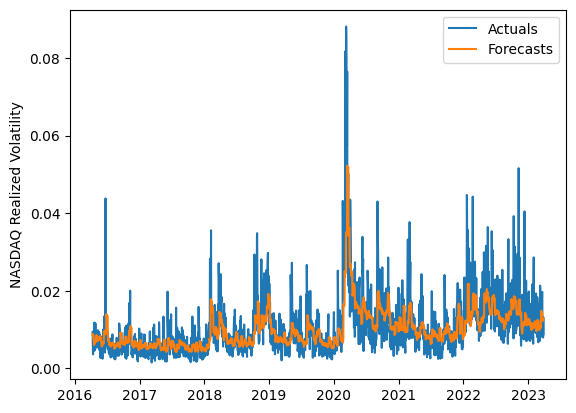

In [ ]:
# Best model
plt.plot(df_for_date["Date"], test)
plt.plot(df_for_date["Date"], true_predictions) 
plt.ylabel("NASDAQ Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=10 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/10)):
    row = [[a] for a in scaled_test_input[i*10:(i*10)+window_size]]
    X.append(row)
  return np.array(X)

In [ ]:
for i in range (15):
  n_features = 2
  n_input = 21
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(168, activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dense(10))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=7)
  test=test[:len(test)-5]
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/10))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/7
64/64 [==============================] - 2s 5ms/step - loss: 0.0032 - accuracy: 0.0805 - mean_absolute_error: 0.0466
Epoch 2/7
64/64 [==============================] - 0s 6ms/step - loss: 0.0021 - accuracy: 0.0519 - mean_absolute_error: 0.0414
Epoch 3/7
64/64 [==============================] - 0s 5ms/step - loss: 0.0020 - accuracy: 0.2069 - mean_absolute_error: 0.0389
Epoch 4/7
64/64 [==============================] - 0s 5ms/step - loss: 0.0018 - accuracy: 0.1116 - mean_absolute_error: 0.0374
Epoch 5/7
64/64 [==============================] - 0s 5ms/step - loss: 0.0018 - accuracy: 0.1960 - mean_absolute_error: 0.0379
Epoch 6/7
64/64 [==============================] - 0s 5ms/step - loss: 0.0018 - accuracy: 0.0988 - mean_absolute_error: 0.0373
Epoch 7/7
6/6 [==============================] - 0s 3ms/step
Epoch 1/7
64/64 [==============================] - 3s 5ms/step - loss: 0.0028 - accuracy: 0.2711 - mean_absolute_error: 0.0459
Epoch 2/7
64/64 [==============================] -

In [ ]:
RMSE

[0.0040085298806508025,
 0.004019804288182694,
 0.004368797699860767,
 0.004076942748916651,
 0.004052768906133904,
 0.003998349067277464,
 0.004050114908813202,
 0.00415322044654918,
 0.004253299186775718,
 0.0040619037410419365,
 0.0043906123402137325,
 0.004567350967542988,
 0.004065012528379564,
 0.004025403693935383,
 0.004025780777469798]

In [ ]:
Accuracy

[57.42374792854144,
 56.87666916684461,
 48.72659820997715,
 54.5339336463038,
 55.36246229141217,
 60.952945336384715,
 56.98334218377175,
 51.421597610063465,
 48.27883745723797,
 58.237774497937345,
 47.77980599756367,
 43.8353537061332,
 55.892387358842456,
 58.16884504653102,
 57.3276882598472]

In [ ]:
Quasilikelihood

[0.1268441404970736,
 0.12778182674156024,
 0.15836968590008083,
 0.13609815354464205,
 0.13340437307790276,
 0.1173753137623243,
 0.12781465092320315,
 0.1477641435459736,
 0.15976250844819195,
 0.12512752943292288,
 0.16166154756396112,
 0.17792058918224152,
 0.13144812558359864,
 0.12411786912562779,
 0.12695711390829303]

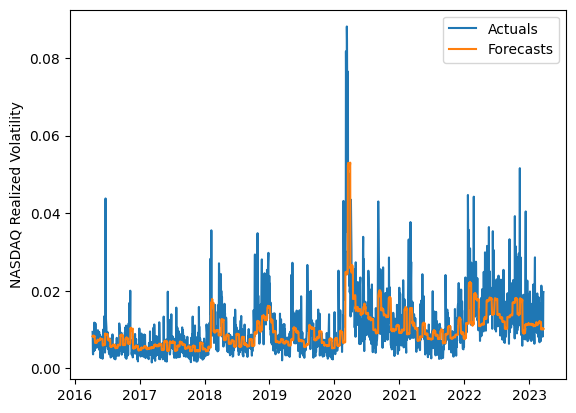

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:1750], test)
plt.plot(df_for_date["Date"][:1750], true_predictions) 
plt.ylabel("NASDAQ Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=22 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/22)):
    row = [[a] for a in scaled_test_input[i*22:(i*22)+window_size]]
    X.append(row)
  return np.array(X)

In [ ]:
for i in range (15):
  n_features = 2
  n_input = 21
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  train = train[int(len(train)*0.5):]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(168, activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dense(22))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=7)
  test=test[:len(test)-17]
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/22))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/7
64/64 [==============================] - 2s 6ms/step - loss: 0.0024 - accuracy: 0.0104 - mean_absolute_error: 0.0458
Epoch 2/7
64/64 [==============================] - 0s 5ms/step - loss: 0.0021 - accuracy: 0.0049 - mean_absolute_error: 0.0400
Epoch 3/7
64/64 [==============================] - 0s 6ms/step - loss: 0.0019 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0385
Epoch 4/7
64/64 [==============================] - 0s 6ms/step - loss: 0.0018 - accuracy: 0.0044 - mean_absolute_error: 0.0374
Epoch 5/7
64/64 [==============================] - 0s 6ms/step - loss: 0.0018 - accuracy: 0.0128 - mean_absolute_error: 0.0372
Epoch 6/7
64/64 [==============================] - 0s 6ms/step - loss: 0.0017 - accuracy: 0.0523 - mean_absolute_error: 0.0369
Epoch 7/7
3/3 [==============================] - 0s 4ms/step
Epoch 1/7
64/64 [==============================] - 2s 5ms/step - loss: 0.0026 - accuracy: 0.0257 - mean_absolute_error: 0.0458
Epoch 2/7
64/64 [=============================

3/3 [==============================] - 1s 4ms/step
Epoch 1/7
64/64 [==============================] - 2s 5ms/step - loss: 0.0026 - accuracy: 0.0494 - mean_absolute_error: 0.0460
Epoch 2/7
64/64 [==============================] - 0s 5ms/step - loss: 0.0021 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0405
Epoch 3/7
64/64 [==============================] - 0s 5ms/step - loss: 0.0022 - accuracy: 0.0015 - mean_absolute_error: 0.0408
Epoch 4/7
64/64 [==============================] - 0s 5ms/step - loss: 0.0020 - accuracy: 4.9383e-04 - mean_absolute_error: 0.0406
Epoch 5/7
64/64 [==============================] - 0s 5ms/step - loss: 0.0018 - accuracy: 0.0074 - mean_absolute_error: 0.0377
Epoch 6/7
64/64 [==============================] - 0s 5ms/step - loss: 0.0019 - accuracy: 4.9383e-04 - mean_absolute_error: 0.0382
Epoch 7/7
64/64 [==============================] - 0s 5ms/step - loss: 0.0018 - accuracy: 0.0667 - mean_absolute_error: 0.0370


3/3 [==============================] - 0s 4ms/step
Epoch 1/7
64/64 [==============================] - 2s 5ms/step - loss: 0.0024 - accuracy: 0.0533 - mean_absolute_error: 0.0443
Epoch 2/7
64/64 [==============================] - 0s 5ms/step - loss: 0.0020 - accuracy: 0.1506 - mean_absolute_error: 0.0394
Epoch 3/7
64/64 [==============================] - 0s 5ms/step - loss: 0.0019 - accuracy: 0.2015 - mean_absolute_error: 0.0376
Epoch 4/7
64/64 [==============================] - 0s 6ms/step - loss: 0.0018 - accuracy: 0.1338 - mean_absolute_error: 0.0378
Epoch 5/7
64/64 [==============================] - 0s 6ms/step - loss: 0.0018 - accuracy: 0.0440 - mean_absolute_error: 0.0371
Epoch 6/7
64/64 [==============================] - 0s 6ms/step - loss: 0.0017 - accuracy: 0.0015 - mean_absolute_error: 0.0371
Epoch 7/7
3/3 [==============================] - 0s 6ms/step
Epoch 1/7
64/64 [==============================] - 3s 6ms/step - loss: 0.0028 - accuracy: 0.0909 - mean_absolute_error: 0.0478

In [ ]:
RMSE

[0.004559766467338159,
 0.004444054247264706,
 0.004641128458272573,
 0.004620776823123884,
 0.00452900524997729,
 0.004871708282216803,
 0.004436843881846079,
 0.004828817517563615,
 0.004735682920448557,
 0.004525548316972094,
 0.004782701524268996,
 0.0044486639655248374,
 0.004656197805247356,
 0.004552285659468051,
 0.004522248478694584]

In [ ]:
Accuracy

[49.25371947349064,
 52.69158755177317,
 57.940276410441925,
 46.37391671405177,
 51.48171015066425,
 44.509376889029454,
 53.80453182875197,
 44.475296038171166,
 51.13148032594883,
 58.7422089555298,
 48.450956237276245,
 53.342386717665335,
 59.36144331228118,
 52.684259116718046,
 51.74914178997667]

In [ ]:
Quasilikelihood

[0.16512649973758006,
 0.15276409345292344,
 0.14813468425034595,
 0.17589278293751673,
 0.15630124810439086,
 0.18438811633769323,
 0.1493891839855471,
 0.1832011430630349,
 0.1611674002432267,
 0.1420152924407858,
 0.16972255542089645,
 0.15020774071692614,
 0.15080865375905664,
 0.15343276132004754,
 0.15588199752646445]

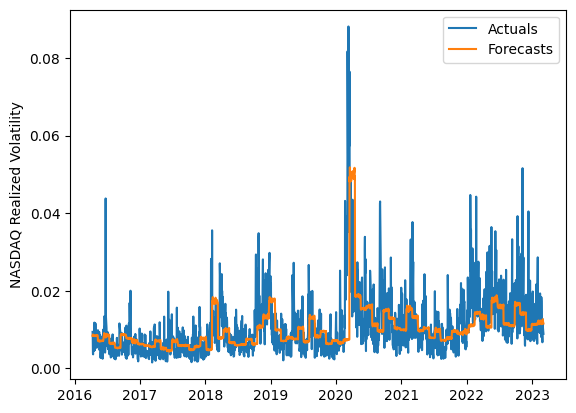

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:1738], test)
plt.plot(df_for_date["Date"][:1738], true_predictions) 
plt.ylabel("NASDAQ Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])